9.	Classification using Deep neural network 
Multiclass classification using Deep Neural Networks: Example: Use the OCR letter
recognition datasethttps


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


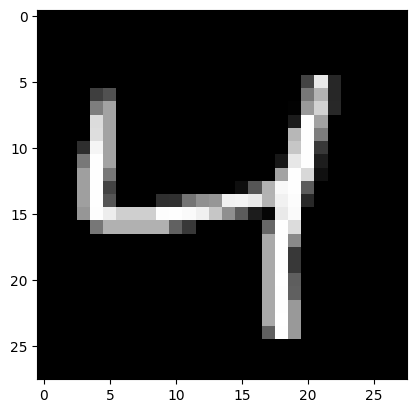

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[2], cmap='gray')
plt.show()
print(x_train[2])


In [3]:
#Step 3: Reshape and Normalize Data
print("X_train shape", x_train.shape)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255


X_train shape (60000, 28, 28)


In [4]:
#Step 4: Convert Labels to One-Hot Encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [5]:
#Step 5: Build the Neural Network Model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 6: Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [7]:
# Step 7: Train the Model
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8587 - loss: 0.4506 - val_accuracy: 0.9637 - val_loss: 0.1090
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9661 - loss: 0.1108 - val_accuracy: 0.9715 - val_loss: 0.0964
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9761 - loss: 0.0771 - val_accuracy: 0.9785 - val_loss: 0.0691
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.9802 - val_loss: 0.0662
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9724 - val_loss: 0.0947
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9879 - loss: 0.0363 - val_accuracy: 0.9810 - val_loss: 0.0687
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9802 - val_loss: 0.0717
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9913 - loss: 0.0256 - val_acc

In [8]:
#Step 8: Evaluate the Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.07732227444648743
Test accuracy: 0.9850999712944031


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


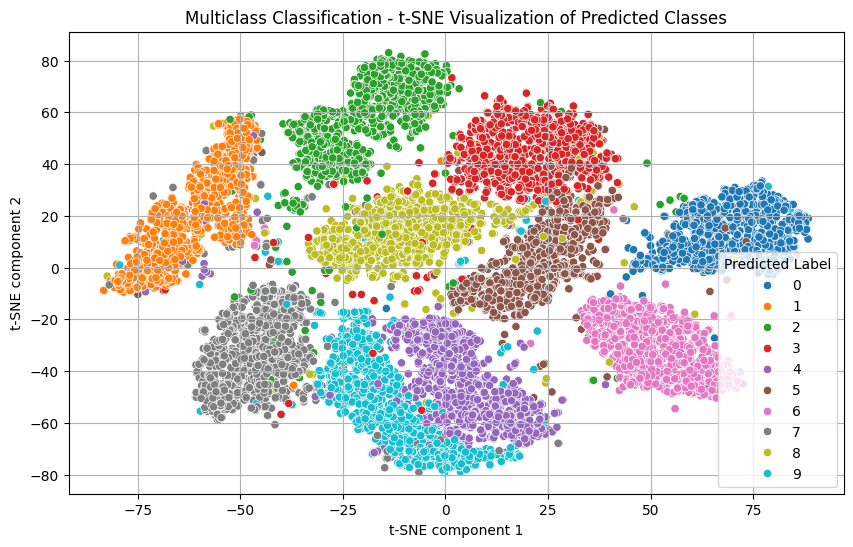

In [9]:

# Step 1: Use the already normalized and reshaped x_test
# Step 2: Predict the classes
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Step 3: Reduce dimensions of input features to 2D using t-SNE
x_test_2d = TSNE(n_components=2, random_state=42).fit_transform(x_test)

# Step 4: Plot the 2D visualization with predicted class labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test_2d[:, 0], y=x_test_2d[:, 1], hue=y_pred_classes, palette='tab10', legend='full')
plt.title("Multiclass Classification - t-SNE Visualization of Predicted Classes")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.legend(title='Predicted Label')
plt.grid(True)
plt.show()
